In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from IPython.display import Image
from skimage import io 
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Cost function
$$
J(c^{(1)},\cdots ,c^{(m)},\mu_1, \cdots, \mu_k)= \frac{1}{m}\sum_{i=1}^m {\left\| x^{(i)}-\mu_c(i) \right\|}^2
$$

In [2]:
def find_closest_centroids(X, centroids):  
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m) 
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [4]:
data = loadmat('./data/ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])  #定义初始中心位置

idx = find_closest_centroids(X, initial_centroids) #找最接近的聚类中心的索引
idx[0:3] #切片前3个聚类中心  #因为切片尾端为切片数+1的数

array([0., 2., 1.])

In [5]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


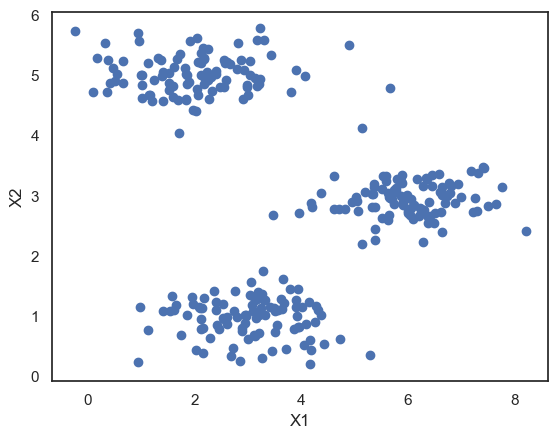

In [9]:
plt.scatter('X1', 'X2', data=data2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
def compute_centroids(X, idx, k): 
    m, n = X.shape
    centroids = np.zeros((k, n))
  
    for i in range(k):
        indices = np.where(idx == i) 
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
        
    return centroids

In [12]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [13]:
def run_k_means(X, initial_centroids, max_iters): 
    m, n = X.shape
    k = initial_centroids.shape[0] 
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [14]:
idx, centroids = run_k_means(X, initial_centroids, 10)

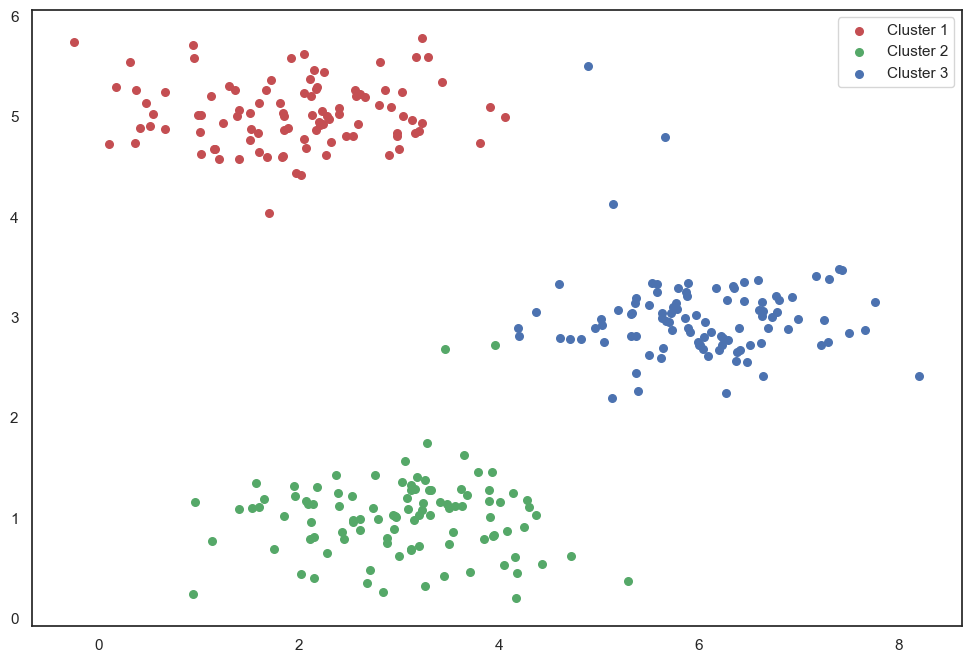

In [15]:
cluster1 = X[np.where(idx == 0)[0],:] 
cluster2 = X[np.where(idx == 1)[0],:] 
cluster3 = X[np.where(idx == 2)[0],:] 

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [16]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)  
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [17]:
init_centroids(X, 3)

array([[7.24694794, 2.96877424],
       [3.64846482, 1.62849697],
       [6.40773863, 2.67554951]])

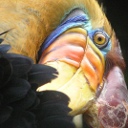

In [19]:
Image(filename='./data/bird_small.png')

In [20]:
image_data = loadmat('./data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [21]:
A = image_data['A']
A.shape

(128, 128, 3)

In [22]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [23]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)  #k=16

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10) 

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids) 

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:] 

X_recovered.shape

(16384, 3)

In [24]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

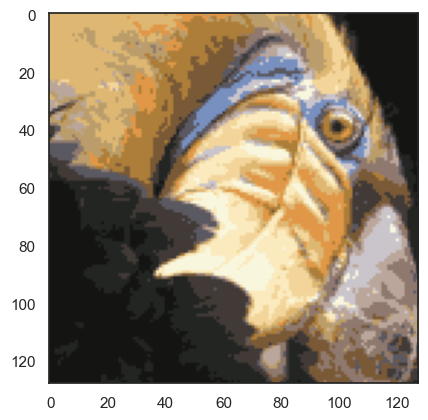

In [25]:
plt.imshow(X_recovered)
plt.show()

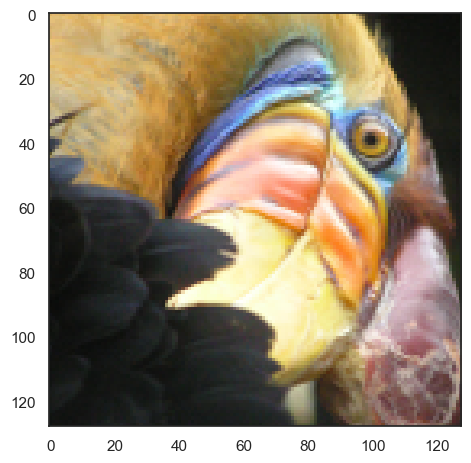

In [27]:
# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('./data/bird_small.png') / 255.  
io.imshow(pic) 
plt.show()

In [28]:
pic.shape

(128, 128, 3)

In [29]:
data = pic.reshape(128*128, 3) 

In [30]:
data.shape

(16384, 3)

In [32]:
model = KMeans(n_clusters=16, n_init=100)

In [33]:
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [34]:
centroids = model.cluster_centers_ #centroids:中心
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [35]:
centroids[C].shape 

(16384, 3)

In [36]:
compressed_pic = centroids[C].reshape((128,128,3))

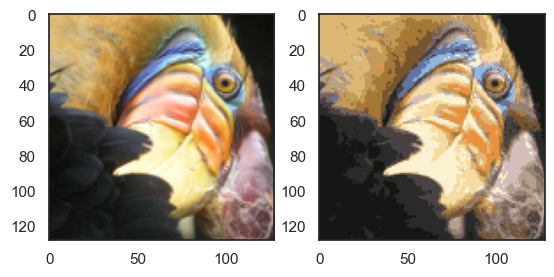

In [37]:
fig, ax = plt.subplots(1, 2) #创建1行2列的子图
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

## Principal component analysis

In [38]:
data = loadmat('./data/ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

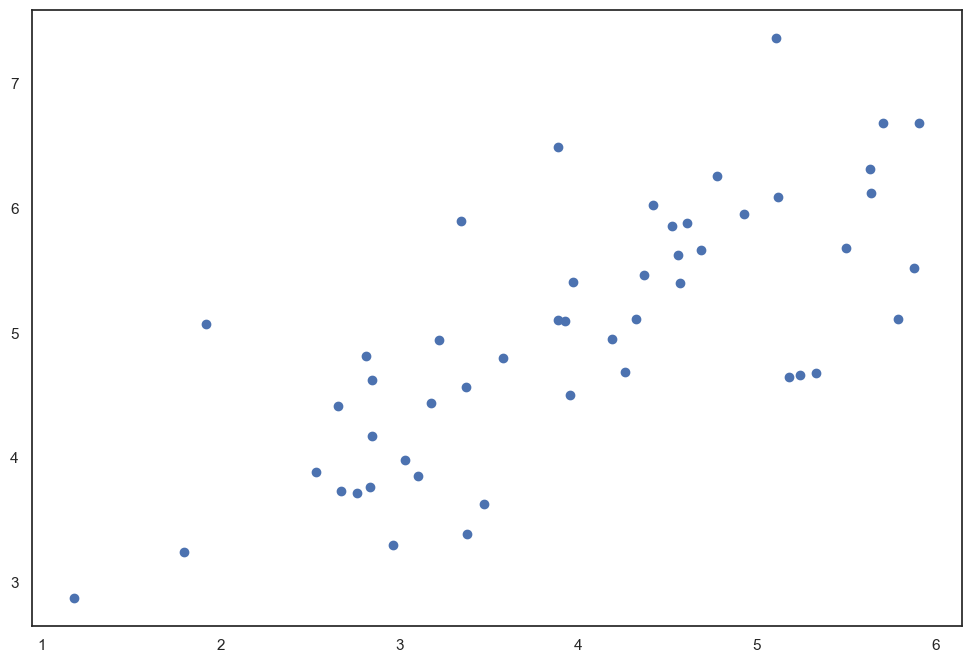

In [39]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

In [40]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std() 
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov) 
    
    return U, S, V

In [41]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [42]:
def project_data(X, U, k):
    U_reduced = U[:,:k] 
    return np.dot(X, U_reduced)  

In [43]:
Z = project_data(X, U, 1)
Z 

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [44]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [45]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

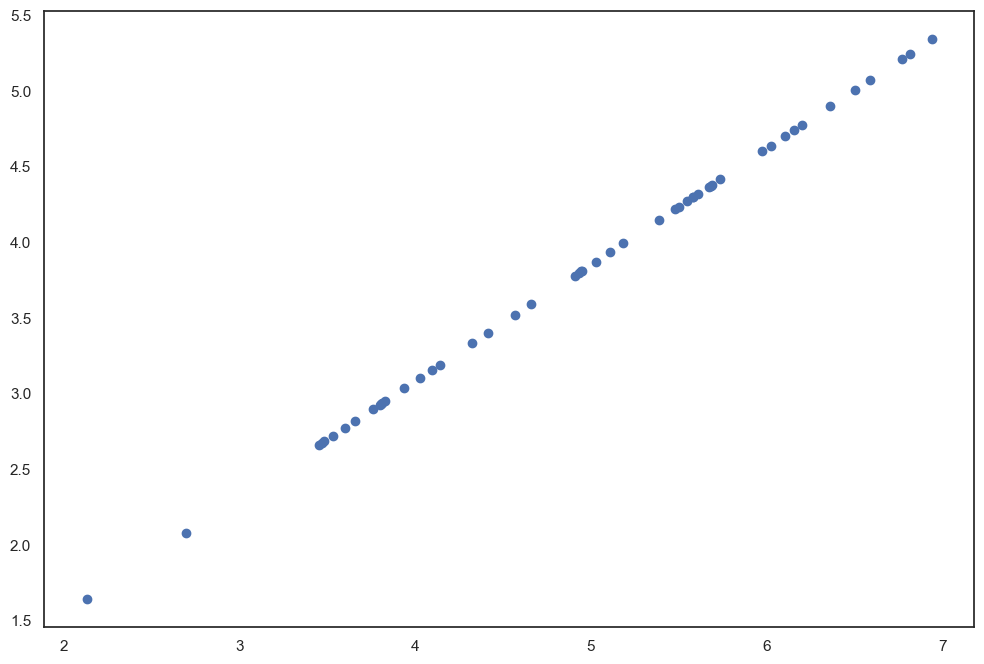

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

In [48]:
faces = loadmat('./data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [49]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :] 

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


In [50]:
face = np.reshape(X[3,:], (32, 32))

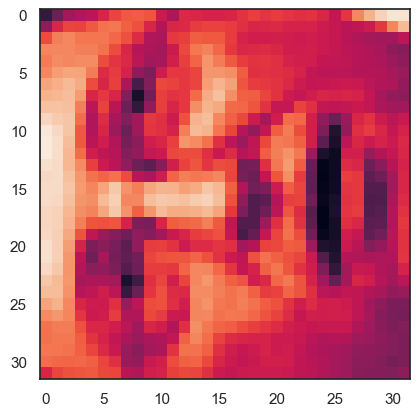

In [51]:
plt.imshow(face)
plt.show()

In [52]:
U, S, V = pca(X)
Z = project_data(X, U, 100)  

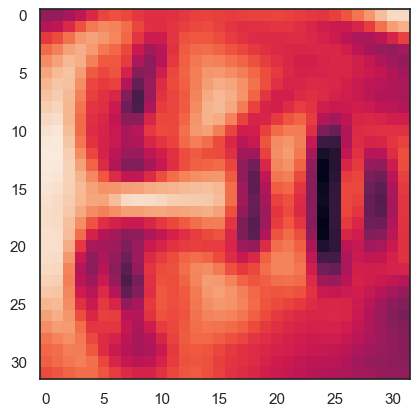

In [53]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()